Weather Data Classification Using Decision Tree Algorithm

 Predict relative humidity at 3 pm if the morning humidity is greater than 28 or 29.

In [1]:
#importing the necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# read the data using pandas dataframe
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/My Drive/Daily_Weather_Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Description**
This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that can capture weather related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of 3 years from September 2011 to September 2014, to ensure that sufficient data for different weather conditions are captured.

In [5]:
#Printing Column names
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [6]:
#Viewing Data
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,917.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,918.347688,71.403843,100.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [7]:
#Checking shape of data
data.shape

(1095, 11)

In [8]:
#checking is there exists null values in the dataset or not
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


### Data Cleaning and feature engineering Steps

In [9]:
del data['number'] #Deleting number column as that is not much helpful

In [10]:
data = data.dropna() #dropping rows where we have NULL values

Calculate howmany rows are deleted which contains the Null Values

In [11]:
#Checkins shape again after above operation
data.shape

(1064, 10)

In [12]:
#lets create addition column for high humidity
#creating a copy of data for cleaning purpose
clean_data=data.copy()

#defining high humidity as "relative_humidity>28" at 3 pm
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >28) *1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

the resulting 'high_humidity_label' column will have values of 1 for high humidity conditions and 0 for low humidity conditions based on the relative humidity at 3 PM.

In [14]:
 #Creating the target variable of the data for modelling
 y = clean_data[['high_humidity_label']].copy()
 y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


Storing all the morning features other than Humidity at 3pm in the mroning feature

In [17]:
#Creating a list of all independent features apart from "relative humidity at 3pm"
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [18]:
#copying the values from the clean_data dataset to new dataset x which only consist of the morning features data
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [20]:
#The target columns
y.columns

Index(['high_humidity_label'], dtype='object')

## **Model Training**

In [22]:
 #splitting data in teat and train
 X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

We have made a classifier for making the decision tree and to train the data using this classifier

In [23]:
#fitting decision tree model on data
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

fixing max leaf nodes to 10 which means putting the limit to grow a tree. This is to avoid the overfitting

[Text(0.45454545454545453, 0.9166666666666666, 'x[8] <= 28.364\ngini = 0.496\nsamples = 712\nvalue = [388, 324]'),
 Text(0.2727272727272727, 0.75, 'x[8] <= 19.955\ngini = 0.239\nsamples = 419\nvalue = [361, 58]'),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.103\nsamples = 311\nvalue = [294, 17]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= 917.285\ngini = 0.471\nsamples = 108\nvalue = [67, 41]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[4] <= 130.6\ngini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.18181818181818182, 0.25, 'x[4] <= 72.8\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.337\nsamples = 70\nvalue = [55, 15]'),
 Text(0.6

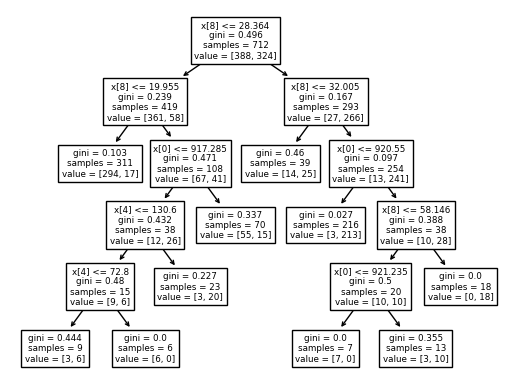

In [30]:
#visualizing tree structure
from sklearn import tree
tree.plot_tree(humidity_classifier)

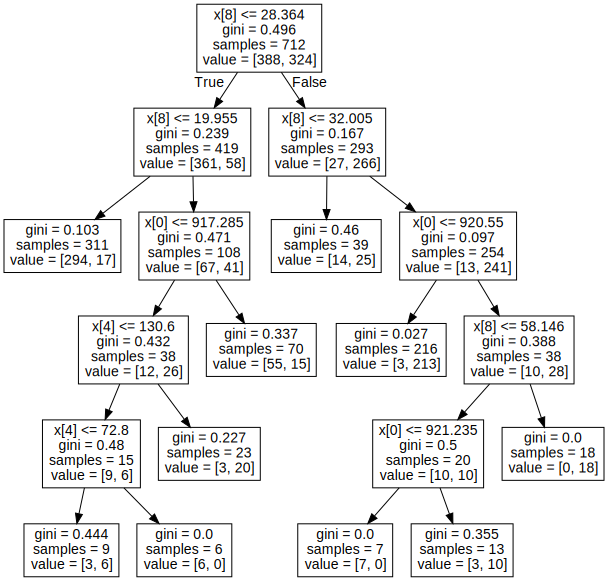

In [31]:
#visualizing decision tree using graphviz library
import graphviz
graph_data=tree.export_graphviz(humidity_classifier, out_file=None)
graph=graphviz.Source(graph_data)
graph

In [24]:
#predicting values on test set
y_predicted = humidity_classifier.predict(X_test)

In [25]:
#Checking test accuracy
accuracy_score(y_test,y_predicted)*100

88.92045454545455

In [27]:
#Confusion matrix
confusion_matrix(y_test,y_predicted)


array([[166,  14],
       [ 25, 147]])